In [1371]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [1372]:
df20 = pd.read_csv("acidentes2020_todas_causas_tipos.csv", encoding='iso-8859-1', delimiter=";")
df23 = pd.read_csv("acidentes2023_todas_causas_tipos.csv", encoding='iso-8859-1', delimiter=";")
df = pd.concat([df20, df23], ignore_index=True)

In [1373]:
df.drop_duplicates(inplace=True)

In [1374]:
print(df20.shape, end=' | ')
print(df23.shape, end=' | ')
print(df.shape)

(348047, 37) | (514799, 37) | (862846, 37)


In [1375]:
df.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,260031.0,578475.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,Feminino,0,0,1,0,"-11,77460203","-49,10744996",SPRF-TO,DEL02-TO,UOP02-DEL01-TO
1,260031.0,578475.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,Feminino,0,0,1,0,"-11,77460203","-49,10744996",SPRF-TO,DEL02-TO,UOP02-DEL01-TO
2,260031.0,578988.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,Masculino,0,0,1,0,"-11,77460203","-49,10744996",SPRF-TO,DEL02-TO,UOP02-DEL01-TO
3,260031.0,578988.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,Masculino,0,0,1,0,"-11,77460203","-49,10744996",SPRF-TO,DEL02-TO,UOP02-DEL01-TO
4,260031.0,578987.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,Masculino,0,0,1,0,"-11,77460203","-49,10744996",SPRF-TO,DEL02-TO,UOP02-DEL01-TO


In [1376]:
df.columns

Index(['id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br',
       'km', 'municipio', 'causa_principal', 'causa_acidente',
       'ordem_tipo_acidente', 'tipo_acidente', 'classificacao_acidente',
       'fase_dia', 'sentido_via', 'condicao_metereologica', 'tipo_pista',
       'tracado_via', 'uso_solo', 'id_veiculo', 'tipo_veiculo', 'marca',
       'ano_fabricacao_veiculo', 'tipo_envolvido', 'estado_fisico', 'idade',
       'sexo', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos',
       'latitude', 'longitude', 'regional', 'delegacia', 'uop'],
      dtype='object')

In [1377]:
df.loc[0][0:15]

id                                       260031.0
pesid                                    578475.0
data_inversa                           2020-01-01
dia_semana                           quarta-feira
horario                                  01:00:00
uf                                             TO
br                                          153.0
km                                          678,1
municipio                                  GURUPI
causa_principal                               Sim
causa_acidente                   Animais na Pista
ordem_tipo_acidente                             1
tipo_acidente             Atropelamento de Animal
classificacao_acidente        Com Vítimas Feridas
fase_dia                              Plena Noite
Name: 0, dtype: object

In [1378]:
df.loc[0][15:]

sentido_via                              Crescente
condicao_metereologica                     Nublado
tipo_pista                                 Simples
tracado_via                                   Reta
uso_solo                                       Não
id_veiculo                                  464101
tipo_veiculo                             Automóvel
marca                     FIAT/SIENA ATTRACTIV 1.4
ano_fabricacao_veiculo                      2012.0
tipo_envolvido                            Condutor
estado_fisico                        Lesões Graves
idade                                         33.0
sexo                                      Feminino
ilesos                                           0
feridos_leves                                    0
feridos_graves                                   1
mortos                                           0
latitude                              -11,77460203
longitude                             -49,10744996
regional                       

In [1379]:
df['causa_principal'].value_counts()

causa_principal
Sim    523270
Não    339576
Name: count, dtype: int64

**Excluindo colunas desnecessarias**

In [1380]:
df.drop(['pesid', 'id_veiculo', 'marca', 'regional', 'uop', 'causa_principal'], axis=1, inplace=True)

In [1381]:
print(df.shape)

(862846, 31)


**Verificando se há valores nulos**

In [1382]:
valores_vazios = df.isna().sum()
valores_vazios[valores_vazios > 0]

br                         2762
km                         2762
tipo_acidente                 1
ano_fabricacao_veiculo    47486
idade                     84078
delegacia                   513
dtype: int64

### **Tratando valores vazios**

Tipo Acidente

In [1383]:
df['tipo_acidente'].value_counts()

tipo_acidente
Colisão traseira                   129263
Saída de leito carroçável          113693
Tombamento                         105500
Queda de ocupante de veículo        99154
Colisão transversal                 71657
Colisão frontal                     59948
Capotamento                         50399
Colisão com objeto                  43379
Colisão lateral mesmo sentido       35369
Colisão lateral                     33319
Colisão com objeto estático         30527
Atropelamento de Pedestre           27663
Engavetamento                       22146
Colisão lateral sentido oposto      14809
Derramamento de carga                7816
Incêndio                             7676
Atropelamento de Animal              6128
Eventos atípicos                     1714
Colisão com objeto em movimento      1504
Danos eventuais                      1181
Name: count, dtype: int64

In [1384]:
df.fillna({
    'tipo_acidente' : 'Colisão traseira'
}, inplace=True)

Coluna idade

In [1385]:
df['idade'].describe()

count    778768.000000
mean         39.308752
std          39.246982
min           0.000000
25%          27.000000
50%          37.000000
75%          48.000000
max        2022.000000
Name: idade, dtype: float64

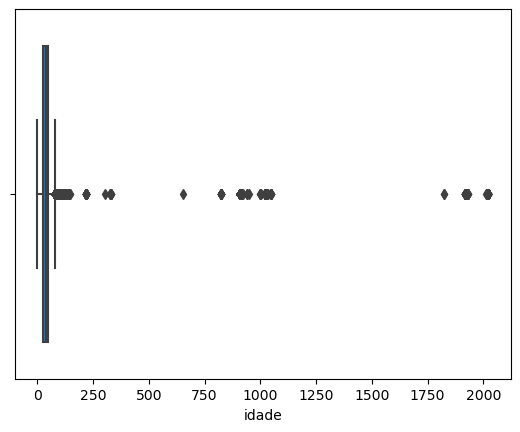

In [1386]:
sns.boxplot(x='idade', data=df)
plt.show()

Tratando os outliers da coluna idade

In [1387]:
df.loc[df['idade'] > 100, 'idade'] = 37

In [1388]:
df['idade'].describe()

count    778768.000000
mean         38.260171
std          15.196067
min           0.000000
25%          27.000000
50%          37.000000
75%          48.000000
max         100.000000
Name: idade, dtype: float64

In [1389]:
#Acredito que o valor 0 possa representar recém-nascidos
df.loc[df['idade'] == 0, 'idade'].count()

1078

c:\Users\DELL G5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


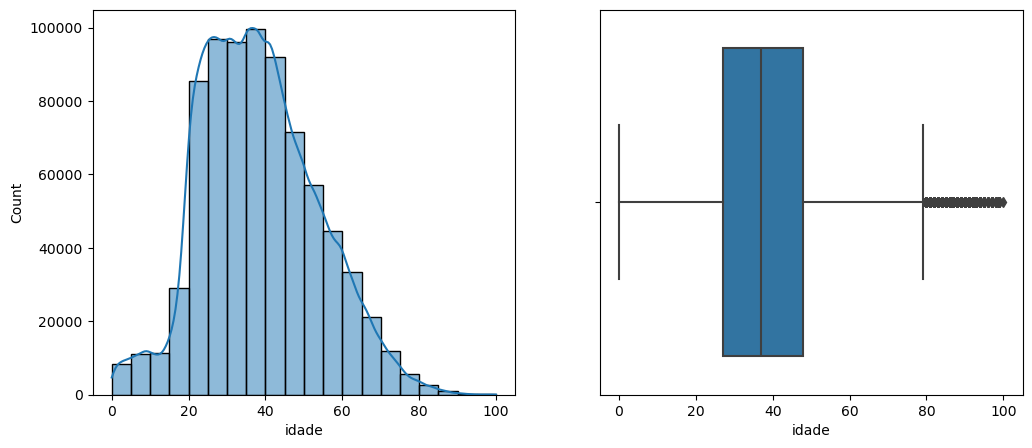

In [1390]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=df, x='idade')
sns.histplot(data=df, x='idade', bins=20, ax=axs[0], kde=True)
plt.show()

In [1391]:
media_idade = df['idade'].mean()
desvio_padrao_idade = df['idade'].std()

valores_aleatorios = np.random.normal(media_idade, desvio_padrao_idade, df['idade'].isnull().sum()).astype(int)
while (valores_aleatorios <= 0).any():
    valores_aleatorios[valores_aleatorios <= 0] = np.random.normal(media_idade, desvio_padrao_idade, (valores_aleatorios <= 0).sum()).astype(int)

c:\Users\DELL G5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


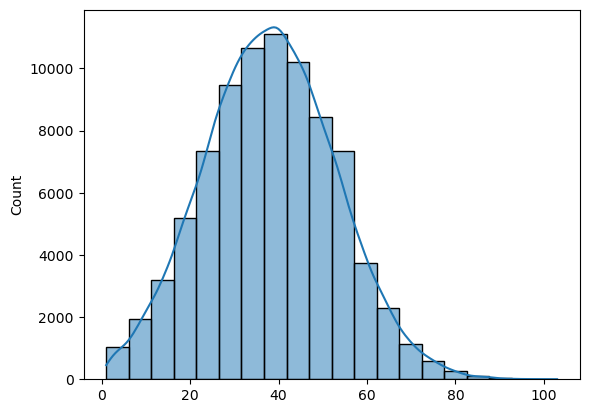

In [1392]:
sns.histplot(valores_aleatorios, bins=20, kde=True)
plt.show()

In [1393]:
df.loc[df['idade'].isnull(), 'idade'] = valores_aleatorios

c:\Users\DELL G5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


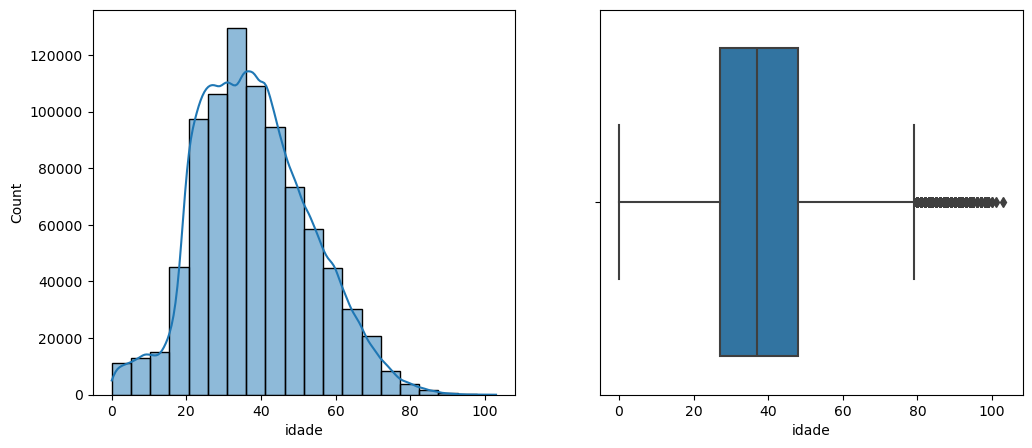

In [1394]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=df, x='idade')
sns.histplot(data=df, x='idade', bins=20, ax=axs[0], kde=True)
plt.show()

In [1395]:
df['idade'] = df['idade'].astype(int)

**Coluna BR**

In [1396]:
df.loc[df['br'].isna(), ['br', 'municipio']]

,br,municipio
559,NaN,SABARA
4491,NaN,RIO DE JANEIRO
4492,NaN,RIO DE JANEIRO
4493,NaN,RIO DE JANEIRO
6402,NaN,SANTO ANTONIO DO LEVERGER
...,...,...
858496,NaN,ELDORADO DO SUL
858497,NaN,ELDORADO DO SUL
858498,NaN,ELDORADO DO SUL
858499,NaN,ELDORADO DO SUL


In [1397]:
def modo_especial(x):
    moda = x.mode()
    if len(moda) > 0:
        return moda.iloc[0]
    else:
        return None

In [1398]:
moda_br_municipio = df.groupby('municipio')['br'].agg(modo_especial)
moda_br_municipio

municipio
ABADIA DE GOIAS     60.0
ABADIANIA           60.0
ABARE              116.0
ABEL FIGUEIREDO    222.0
ABRE CAMPO         262.0
                   ...  
XAPURI             317.0
XAXIM              282.0
XEXEU              101.0
XINGUARA           155.0
ZE DOCA            316.0
Name: br, Length: 1903, dtype: float64

In [1399]:
df['br'].value_counts()

br
116.0    125973
101.0    112172
40.0      43635
381.0     42644
364.0     34756
          ...  
484.0         6
437.0         6
265.0         5
342.0         2
477.0         2
Name: count, Length: 121, dtype: int64

In [1400]:
df['br'] = df.apply(lambda row: moda_br_municipio[row['municipio']] if pd.isna(row['br']) else row['br'], axis=1)

In [1401]:
df.loc[df['br'].isna(), 'municipio'].unique()

array(['GALIA', 'SAO JOAO DO PIAUI', 'ARAPIRACA', 'FRANCO DA ROCHA',
       'GARRAFAO DO NORTE', 'SANTANA', 'FARROUPILHA', 'AMETISTA DO SUL',
       'TRAMANDAI', 'PORTO NACIONAL', 'SAO FELIX DO XINGU'], dtype=object)

In [1402]:
municipios_br_comNaN = {
    'GALIA': '153',
    'SAO JOAO DO PIAUI': '230',
    'ARAPIRACA': '316',
    'FRANCO DA ROCHA': '116',
    'GARRAFAO DO NORTE': '010',
    'SANTANA': '156',
    'FARROUPILHA': '116',
    'AMETISTA DO SUL': '386',
    'TRAMANDAI': '101',
    'PORTO NACIONAL': '153',
    'SAO FELIX DO XINGU': '155'
}

In [1403]:
df['br'] = df.apply(lambda row: municipios_br_comNaN.get(row['municipio'], row['br']), axis=1)

In [1404]:
df['br'].isna().sum()

0

**Coluna KM**

In [1405]:
df['km'].value_counts()

km
3        3365
5        3158
2        3142
1        3067
4        2422
         ... 
829,9       1
906,9       1
941,3       1
752,8       1
757,7       1
Name: count, Length: 8765, dtype: int64

In [1406]:
df['km'] = df['km'].str.split(',').str[0]

In [1407]:
quantidade = df['km'].isna().sum()
quantidade

2762

In [1408]:
numeros_possiveis = np.arange(1, 101)

probabilidades = [0.05] * 10 + [0.95 / 90] * 90

probabilidades /= np.sum(probabilidades)

numeros_aleatorios = np.random.choice(numeros_possiveis, size=quantidade, p=probabilidades)

c:\Users\DELL G5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

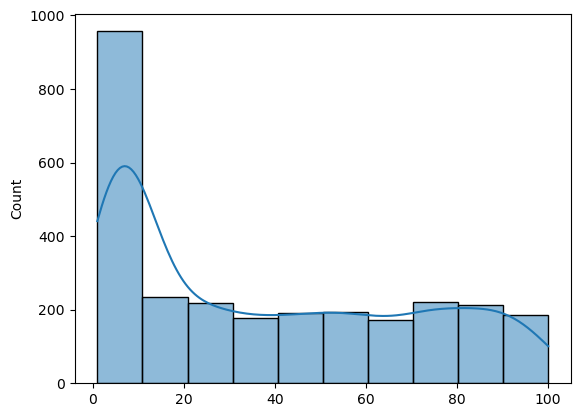

In [1409]:
sns.histplot(data=numeros_aleatorios, bins=10, kde=True)

In [1410]:
df.loc[df['km'].isnull(), 'km'] = numeros_aleatorios

Ano de Fabricação

In [1411]:
df['ano_fabricacao_veiculo'].describe()

count    815360.000000
mean       1924.087406
std         410.051911
min           0.000000
25%        2007.000000
50%        2012.000000
75%        2017.000000
max        2023.000000
Name: ano_fabricacao_veiculo, dtype: float64

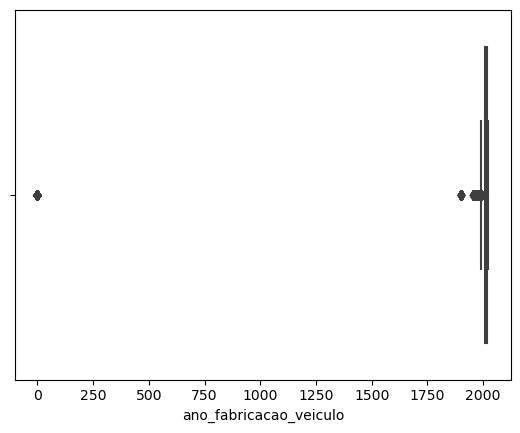

In [1412]:
sns.boxplot(data=df, x='ano_fabricacao_veiculo')
plt.show()

Há presença de valores nulos, vazios e menores que 1900

In [1413]:
df.loc[df['ano_fabricacao_veiculo'] <= 1950, 'ano_fabricacao_veiculo'].value_counts()

ano_fabricacao_veiculo
0.0       35411
1900.0       62
Name: count, dtype: int64

c:\Users\DELL G5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


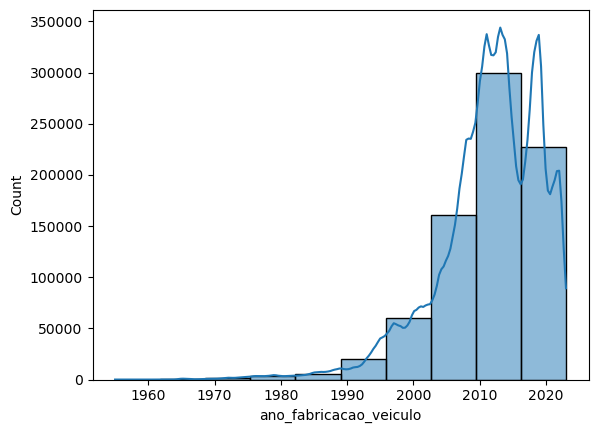

In [1414]:
antes = sns.histplot(data=df.loc[df['ano_fabricacao_veiculo'] >= 1950], x='ano_fabricacao_veiculo', bins=10, kde=True)
plt.show(antes)

In [1415]:
# Para os valores NaN
total_valores = df['ano_fabricacao_veiculo'].isnull().sum()

num_valores_intervalo_1 = int(total_valores * 0.8)
num_valores_intervalo_2 = int(total_valores * 0.035)
num_valores_outros = total_valores - num_valores_intervalo_1 - num_valores_intervalo_2

valores_intervalo_1 = np.random.randint(2000, 2022, num_valores_intervalo_1)

valores_intervalo_2 = np.random.randint(2022, 2024, num_valores_intervalo_2)

valores_outros = np.random.randint(1980, 2022, num_valores_outros)
anos_aleatorios = np.concatenate((valores_intervalo_1, valores_intervalo_2, valores_outros))

np.random.shuffle(anos_aleatorios)

c:\Users\DELL G5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


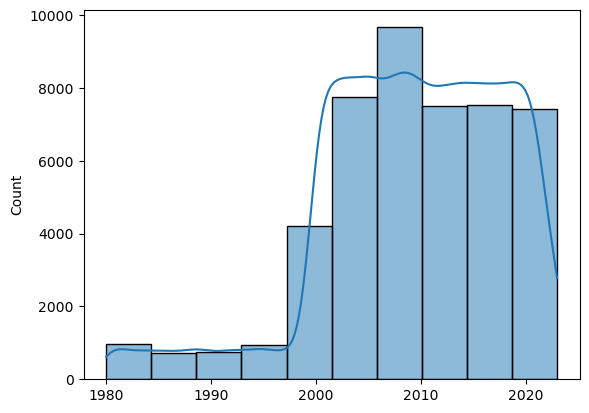

In [1416]:
sns.histplot(data=anos_aleatorios, bins=10, kde=True)
plt.show()

In [1417]:
df.loc[df['ano_fabricacao_veiculo'].isna(), 'ano_fabricacao_veiculo'] = anos_aleatorios

In [1418]:
df['ano_fabricacao_veiculo'] = df['ano_fabricacao_veiculo'].astype(int)

In [1419]:
valores_zero = df.loc[df['ano_fabricacao_veiculo'] <= 1950].shape[0]

# Calcular o número de valores para cada intervalo, colocando maiores probabilidades para valores entre 2000 a 2022
num_valores_intervalo_1 = int(valores_zero * 0.8)
num_valores_intervalo_2 = int(valores_zero * 0.035)
num_valores_outros = valores_zero - num_valores_intervalo_1 - num_valores_intervalo_2

# Gerar valores aleatórios para cada intervalo
valores_intervalo_1 = np.random.randint(2000, 2022, num_valores_intervalo_1)
valores_intervalo_2 = np.random.randint(2022, 2024, num_valores_intervalo_2)
valores_outros = np.random.randint(1980, 2022, num_valores_outros)

anos0_aleatorios = np.concatenate((valores_intervalo_1, valores_intervalo_2, valores_outros))

np.random.shuffle(anos0_aleatorios)

In [1420]:
df.loc[df['ano_fabricacao_veiculo'] <= 1950, 'ano_fabricacao_veiculo'] = anos0_aleatorios

c:\Users\DELL G5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


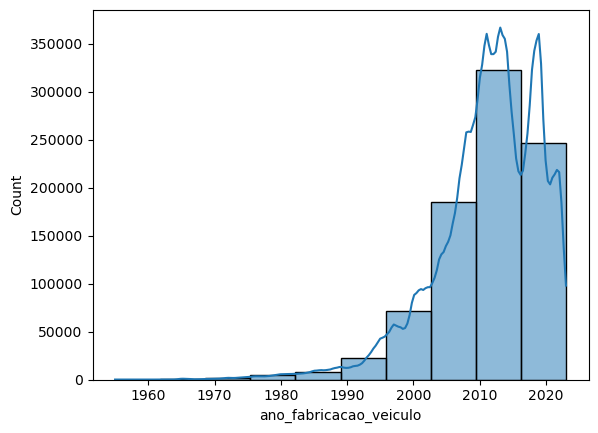

In [1421]:
sns.histplot(data=df, bins=10, kde=True, x='ano_fabricacao_veiculo')
plt.show()

Delegacia

In [1422]:
moda_delagacia_municipio = df.groupby('municipio')['delegacia'].agg(modo_especial)
moda_delagacia_uf = df.groupby('uf')['delegacia'].agg(modo_especial)

In [1423]:
df['delegacia'] = df.apply(lambda row: moda_delagacia_municipio[row['municipio']] if pd.isna(row['delegacia']) else row['delegacia'], axis=1)
df['delegacia'] = df.apply(lambda row: moda_delagacia_uf[row['uf']] if pd.isna(row['delegacia']) else row['delegacia'], axis=1)

Foi observado anteriormente tipos de dados incorretos

In [1424]:
df.dtypes[:20]

id                        float64
data_inversa               object
dia_semana                 object
horario                    object
uf                         object
br                         object
km                         object
municipio                  object
causa_acidente             object
ordem_tipo_acidente         int64
tipo_acidente              object
classificacao_acidente     object
fase_dia                   object
sentido_via                object
condicao_metereologica     object
tipo_pista                 object
tracado_via                object
uso_solo                   object
tipo_veiculo               object
ano_fabricacao_veiculo      int32
dtype: object

In [1425]:
df.dtypes[20:]

tipo_envolvido    object
estado_fisico     object
idade              int32
sexo              object
ilesos             int64
feridos_leves      int64
feridos_graves     int64
mortos             int64
latitude          object
longitude         object
delegacia         object
dtype: object

O tipo object significa que há dois ou mais tipos de dados misturados

***Formatando os tipos de dados***

In [1426]:
df['id'].value_counts()

id
513470.0    1512
508740.0     990
543737.0     900
502263.0     880
563408.0     816
            ... 
549178.0       1
549177.0       1
549175.0       1
265422.0       1
284383.0       1
Name: count, Length: 131310, dtype: int64

In [1427]:
df['id'] = df['id'].astype(str)
df['id'] = df['id'].str.replace('.0', '')

In [1428]:
df = df.drop_duplicates(subset=['id', 'idade'])

In [1429]:
df['id'].value_counts()

id
508740    77
568579    67
324704    67
571203    61
524815    61
          ..
542507     1
542508     1
542509     1
542510     1
548783     1
Name: count, Length: 131310, dtype: int64

In [1430]:
df['data_inversa'].value_counts()

data_inversa
2023-12-23    1029
2023-06-11     899
2023-07-23     891
2020-10-10     859
2023-12-15     851
              ... 
2020-03-28     208
2020-03-30     195
2020-03-25     178
2020-03-26     175
2020-03-23     167
Name: count, Length: 731, dtype: int64

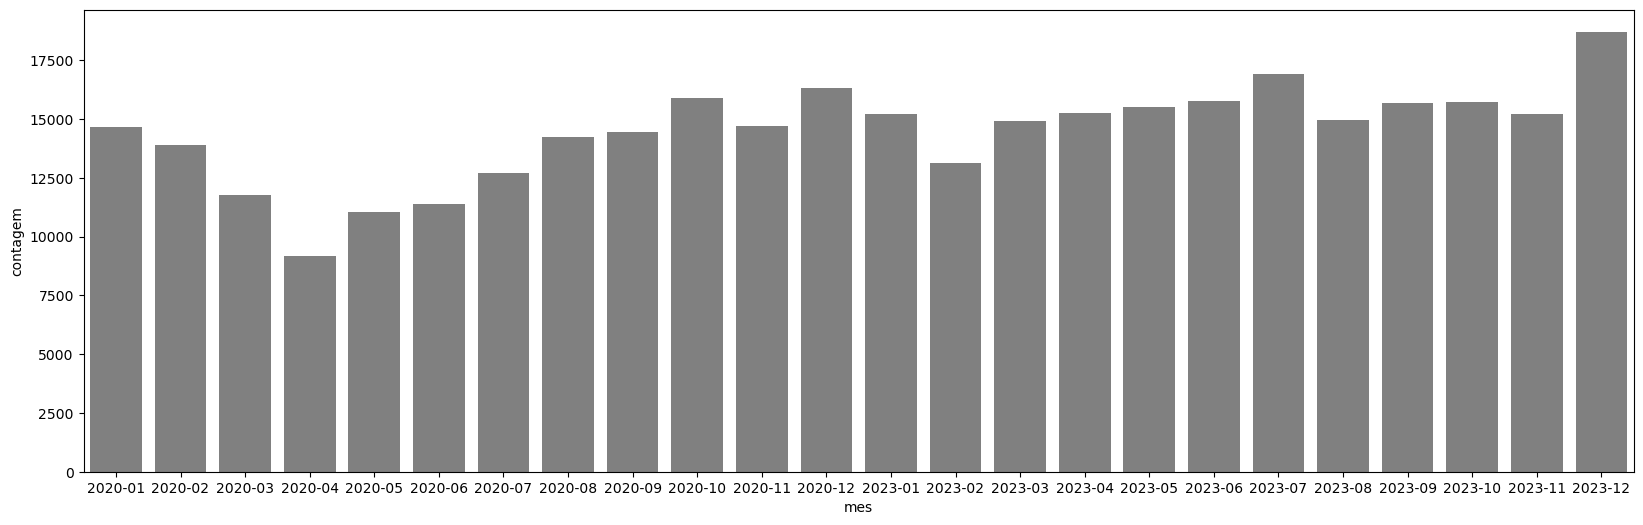

In [1431]:
df['data_inversa'] = pd.to_datetime(df['data_inversa'])

df['mes'] = df['data_inversa'].dt.to_period('M')

contagem_meses = df.groupby('mes').size().reset_index(name='contagem')

plt.figure(figsize=(20, 6))
sns.barplot(x='mes', y='contagem', data=contagem_meses, color='gray')
plt.show()

In [1432]:
df['horario'] = pd.to_datetime(df['horario'], format='%H:%M:%S')

c:\Users\DELL G5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


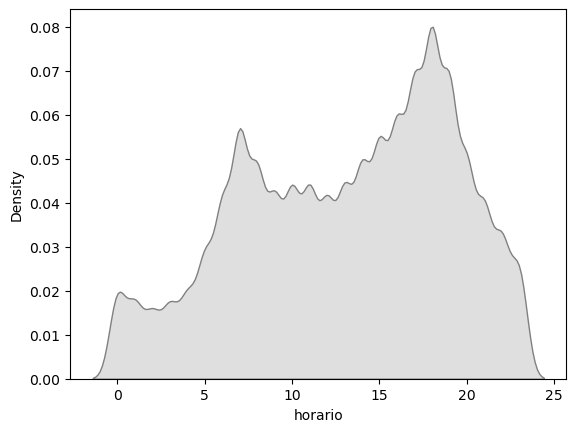

In [1433]:
sns.kdeplot(df['horario'].dt.hour, fill=True, color='gray')

plt.show()

In [1434]:
df['horario'].value_counts()

horario
1900-01-01 19:00:00    5131
1900-01-01 18:30:00    5027
1900-01-01 18:00:00    4962
1900-01-01 17:00:00    4182
1900-01-01 20:00:00    3895
                       ... 
1900-01-01 01:32:00       1
1900-01-01 04:28:00       1
1900-01-01 03:49:00       1
1900-01-01 01:46:00       1
1900-01-01 03:29:00       1
Name: count, Length: 1424, dtype: int64

In [1435]:
df['data_completa'] = df['data_inversa'] + pd.to_timedelta(df['horario'].dt.strftime('%H:%M:%S'))
df['data_completa'].value_counts()

data_completa
2023-03-05 12:35:00    77
2023-07-21 22:30:00    71
2023-12-17 18:15:00    67
2020-11-29 20:30:00    67
2023-07-03 05:45:00    65
                       ..
2023-03-20 17:15:00     1
2023-03-20 05:40:00     1
2023-03-20 15:48:00     1
2023-03-20 14:25:00     1
2023-01-14 18:00:00     1
Name: count, Length: 88629, dtype: int64

In [1436]:
df.drop(['data_inversa', 'horario', 'mes'], axis=1, inplace=True)

In [1437]:
df.shape

(347463, 30)

In [1438]:
df['uf'].value_counts()

uf
MG    45835
PR    37979
SC    36610
RS    24471
RJ    23685
SP    23021
BA    19917
GO    17173
PE    15050
ES    11499
MT    11487
MS     9246
RO     8566
PB     8127
CE     7971
MA     7018
PI     6902
RN     6814
PA     6602
DF     5383
TO     3583
AL     3111
SE     2903
AC     1416
RR     1229
AM      953
AP      912
Name: count, dtype: int64

In [1439]:
df['uf'] = df['uf'].astype(str)

In [1440]:
df['dia_semana'].value_counts()

dia_semana
domingo          60515
sábado           58498
sexta-feira      53237
segunda-feira    46598
quinta-feira     44331
quarta-feira     42848
terça-feira      41436
Name: count, dtype: int64

In [1441]:
df['dia_semana'] = df['dia_semana'].astype(str)

In [1442]:
df['br'] = 'BR-' + df['br'].astype(int).astype(str)

In [1443]:
df['br'].unique()

array(['BR-153', 'BR-116', 'BR-101', 'BR-364', 'BR-319', 'BR-369',
       'BR-104', 'BR-290', 'BR-470', 'BR-282', 'BR-156', 'BR-60', 'BR-20',
       'BR-324', 'BR-373', 'BR-407', 'BR-381', 'BR-316', 'BR-262',
       'BR-40', 'BR-376', 'BR-392', 'BR-163', 'BR-459', 'BR-277',
       'BR-308', 'BR-10', 'BR-230', 'BR-222', 'BR-232', 'BR-50', 'BR-356',
       'BR-70', 'BR-493', 'BR-393', 'BR-365', 'BR-280', 'BR-408',
       'BR-135', 'BR-343', 'BR-158', 'BR-467', 'BR-361', 'BR-80',
       'BR-414', 'BR-447', 'BR-242', 'BR-304', 'BR-259', 'BR-251',
       'BR-110', 'BR-386', 'BR-210', 'BR-367', 'BR-146', 'BR-235',
       'BR-487', 'BR-293', 'BR-174', 'BR-405', 'BR-465', 'BR-476',
       'BR-226', 'BR-452', 'BR-330', 'BR-428', 'BR-482', 'BR-420',
       'BR-472', 'BR-480', 'BR-401', 'BR-354', 'BR-469', 'BR-406',
       'BR-423', 'BR-285', 'BR-424', 'BR-267', 'BR-427', 'BR-412',
       'BR-471', 'BR-463', 'BR-429', 'BR-287', 'BR-272', 'BR-155',
       'BR-485', 'BR-415', 'BR-448', 'BR-418', 'B

municipio                  object
causa_acidente             object
ordem_tipo_acidente         int64
tipo_acidente              object
classificacao_acidente     object
fase_dia                   object
sentido_via                object
condicao_metereologica     object
tipo_pista                 object
tracado_via                object
uso_solo                   object
tipo_veiculo               object
ano_fabricacao_veiculo      int32

In [1444]:
df['municipio'].value_counts()

municipio
BRASILIA                  5383
CURITIBA                  4079
GUARULHOS                 4009
SAO JOSE                  3191
DUQUE DE CAXIAS           2979
                          ... 
PARANA                       1
PEDRO DE TOLEDO              1
CASTANHEIRA                  1
BRASNORTE                    1
SAO MIGUEL DAS MISSOES       1
Name: count, Length: 1903, dtype: int64

In [1445]:
df['causa_acidente'].value_counts()

causa_acidente
Falta de Atenção à Condução                                                      55275
Velocidade Incompatível                                                          29278
Reação tardia ou ineficiente do condutor                                         26316
Desobediência às normas de trânsito pelo condutor                                24422
Ausência de reação do condutor                                                   22894
                                                                                 ...  
Transitar na calçada                                                                25
Semáforo com defeito                                                                23
Condutor não acionou o farol baixo durante o dia em rodovias de pista simples       18
Pedestre - Ingestão de álcool/ substâncias psicoativas                              17
Transitar no acostamento                                                            12
Name: count, Length: 92, dty

In [1446]:
df['causa_acidente'].value_counts()

causa_acidente
Falta de Atenção à Condução                                                      55275
Velocidade Incompatível                                                          29278
Reação tardia ou ineficiente do condutor                                         26316
Desobediência às normas de trânsito pelo condutor                                24422
Ausência de reação do condutor                                                   22894
                                                                                 ...  
Transitar na calçada                                                                25
Semáforo com defeito                                                                23
Condutor não acionou o farol baixo durante o dia em rodovias de pista simples       18
Pedestre - Ingestão de álcool/ substâncias psicoativas                              17
Transitar no acostamento                                                            12
Name: count, Length: 92, dty

In [1447]:
df['ordem_tipo_acidente'].describe()

count    347463.000000
mean          1.403859
std           0.723143
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           9.000000
Name: ordem_tipo_acidente, dtype: float64

In [1448]:
df['classificacao_acidente'].value_counts()

classificacao_acidente
Com Vítimas Feridas    261309
Sem Vítimas             49670
Com Vítimas Fatais      36484
Name: count, dtype: int64

In [1449]:
df['fase_dia'].value_counts()

fase_dia
Pleno dia      189329
Plena Noite    122085
Anoitecer       19886
Amanhecer       16163
Name: count, dtype: int64

In [1450]:
df['sentido_via'].value_counts()

sentido_via
Crescente        186619
Decrescente      159876
Não Informado       968
Name: count, dtype: int64

In [1451]:
df.loc[df['sentido_via'] == 'Não Informado', 'sentido_via'] = 'Crescente'

In [1452]:
df['condicao_metereologica'].value_counts()

condicao_metereologica
Céu Claro           215411
Nublado              54021
Chuva                35601
Sol                  22693
Garoa/Chuvisco       11657
Ignorado              4540
Nevoeiro/Neblina      2974
Vento                  542
Granizo                 21
Neve                     3
Name: count, dtype: int64

In [1453]:
df.loc[df['condicao_metereologica'] == 'Ignorado', 'condicao_metereologica'] = 'Céu Claro'

In [1454]:
df['tipo_pista'].value_counts()

tipo_pista
Simples     181367
Dupla       136201
Múltipla     29895
Name: count, dtype: int64

In [1455]:
df['tracado_via'].value_counts()[:20]

tracado_via
Reta                              202516
Curva                              41492
Interseção de Vias                 12223
Reta;Declive                        8311
Declive                             7765
Reta;Aclive                         6589
Aclive                              6344
Curva;Declive                       5734
Aclive;Reta                         5518
Rotatória                           5149
Declive;Reta                        5062
Reta;Interseção de Vias             3829
Retorno Regulamentado               3132
Declive;Curva                       3091
Interseção de Vias;Reta             2712
Curva;Aclive                        2686
Reta;Em Obras                       1881
Aclive;Curva                        1861
Viaduto                             1813
Reta;Retorno Regulamentado          1332
Name: count, dtype: int64

In [1456]:
df['tracado_via'].unique()[:20]

array(['Reta', 'Curva', 'Reta;Interseção de Vias       ',
       'Declive;Curva                 ', 'Viaduto', 'Interseção de Vias',
       'Aclive;Reta                   ', 'Rotatória',
       'Curva;Declive                 ', 'Declive',
       'Reta;Declive                  ', 'Aclive',
       'Curva;Aclive                  ', 'Retorno Regulamentado',
       'Aclive;Curva                  ', 'Ponte;Reta;Declive            ',
       'Aclive;Viaduto;Curva          ', 'Declive;Reta                  ',
       'Viaduto;Reta;Interseção de Via', 'Reta;Aclive                   '],
      dtype=object)

In [1457]:
df['tracado_via'] = df['tracado_via'].str.split(';').str[0]

In [1458]:
df['tracado_via'].value_counts()

tracado_via
Reta                     228643
Curva                     52102
Declive                   17013
Interseção de Vias        16698
Aclive                    14587
Rotatória                  5960
Retorno Regulamentado      4510
Viaduto                    2695
Em Obras                   2546
Ponte                      2074
Desvio Temporário           569
Túnel                        66
Name: count, dtype: int64

In [1459]:
df['uso_solo'].value_counts()

uso_solo
Não    199028
Sim    148435
Name: count, dtype: int64

In [1460]:
df['uso_solo'] = df['uso_solo'].replace({'Sim': 'Urbano', 'Não': 'Rural'})

In [1461]:
df['uso_solo'] = df['uso_solo'].astype(str)

In [1462]:
df['tipo_veiculo'].value_counts()

tipo_veiculo
Automóvel            138766
Motocicleta           63467
Caminhonete           29217
Não se aplica         26468
Caminhão-trator       25798
Caminhão              24022
Ônibus                 9740
Motoneta               6825
Não Informado          4864
Utilitário             4589
Bicicleta              4409
Camioneta              3573
Micro-ônibus           2261
Outros                 1712
Ciclomotor              892
Semireboque             333
Carroça-charrete        178
Trator de rodas         168
Reboque                  90
Triciclo                 33
Carro de mão             23
Trator misto             12
Trator de esteira         8
Trem-bonde                7
Chassi-plataforma         5
Quadriciclo               3
Name: count, dtype: int64

agrupando


In [1463]:
df['tipo_veiculo'] = df['tipo_veiculo'].replace(
    {'Motoneta': 'Motocicleta', 'Caminhão-trator': 'Caminhão', 'Camioneta': 'Camioneta/Caminhonete',
     'Caminhonete': 'Camioneta/Caminhonete', 'Micro-ônibus': 'Ônibus',
     'Trator de rodas': 'Trator', 'Trator misto': 'Trator', 'Trator de esteira': 'Trator',
     'Chassi-plataforma': 'Caminhão', 'Semireboque': 'Reboque'})

In [1464]:
df.loc[df['tipo_veiculo'] == 'Não Informado', ['tipo_acidente']].value_counts()

tipo_acidente                 
Colisão traseira                  899
Saída de leito carroçável         652
Colisão transversal               548
Colisão com objeto                428
Capotamento                       397
Colisão lateral mesmo sentido     374
Engavetamento                     315
Colisão frontal                   298
Tombamento                        249
Queda de ocupante de veículo      234
Colisão lateral sentido oposto    141
Incêndio                          139
Atropelamento de Pedestre         102
Atropelamento de Animal            58
Eventos atípicos                   23
Derramamento de carga               6
Colisão com objeto estático         1
Name: count, dtype: int64

In [1465]:
df.loc[df['tipo_veiculo'] == 'Não se aplica', ['tipo_acidente']].value_counts()

tipo_acidente                  
Atropelamento de Pedestre          7478
Queda de ocupante de veículo       3107
Tombamento                         3089
Saída de leito carroçável          2493
Colisão traseira                   1943
Colisão transversal                1502
Colisão frontal                    1434
Colisão com objeto                 1139
Capotamento                        1021
Colisão com objeto estático         815
Colisão lateral                     750
Colisão lateral mesmo sentido       553
Derramamento de carga               228
Colisão lateral sentido oposto      217
Atropelamento de Animal             178
Incêndio                            169
Engavetamento                       157
Eventos atípicos                     76
Colisão com objeto em movimento      61
Danos eventuais                      58
Name: count, dtype: int64

In [1466]:
df.loc[df['tipo_veiculo'] == 'Utilitário', ['tipo_acidente']].value_counts()

tipo_acidente                  
Colisão traseira                   869
Saída de leito carroçável          574
Colisão transversal                510
Capotamento                        360
Colisão frontal                    338
Colisão lateral mesmo sentido      274
Colisão com objeto                 266
Tombamento                         258
Colisão com objeto estático        209
Engavetamento                      207
Queda de ocupante de veículo       170
Colisão lateral                    165
Colisão lateral sentido oposto     106
Atropelamento de Pedestre           87
Atropelamento de Animal             76
Incêndio                            48
Danos eventuais                     28
Eventos atípicos                    25
Derramamento de carga               15
Colisão com objeto em movimento      4
Name: count, dtype: int64

In [1467]:
df.loc[df['tipo_veiculo'] == 'Outros', ['tipo_acidente']].value_counts()

tipo_acidente                  
Atropelamento de Pedestre          554
Colisão traseira                   292
Queda de ocupante de veículo       217
Tombamento                         164
Colisão lateral                     96
Saída de leito carroçável           88
Colisão transversal                 57
Colisão com objeto                  49
Colisão frontal                     47
Colisão lateral mesmo sentido       36
Capotamento                         24
Colisão com objeto estático         22
Engavetamento                       18
Eventos atípicos                    10
Derramamento de carga                9
Colisão lateral sentido oposto       7
Colisão com objeto em movimento      7
Danos eventuais                      6
Incêndio                             5
Atropelamento de Animal              4
Name: count, dtype: int64

In [1468]:
filtro = df.loc[df['tipo_veiculo'].isin(['Utilitário', 'Não se aplica', 'Não informado', 'Outros']) & (df['tipo_acidente'] == 'Atropelamento de Pedestre')]
df.loc[filtro.index, 'tipo_veiculo'] = 'Pedestre'

In [1469]:
tamanho_veiculos_aleatorios = df.loc[df['tipo_veiculo'].isin(['Utilitário', 'Não se aplica', 'Não Informado', 'Outros']), 'tipo_veiculo'].value_counts().sum()
veiculos_aleatorios = np.random.choice(df['tipo_veiculo'], size=tamanho_veiculos_aleatorios)

while (veiculos_aleatorios == 'Utilitário').any() or (veiculos_aleatorios == 'Não se aplica').any() or (veiculos_aleatorios == 'Não Informado').any() or (veiculos_aleatorios == 'Outros').any() or (veiculos_aleatorios == 'Pedestre').any():
    indices = np.where((veiculos_aleatorios == 'Utilitário') | (veiculos_aleatorios == 'Não se aplica') | (veiculos_aleatorios == 'Não Informado') | (veiculos_aleatorios == 'Outros') | (veiculos_aleatorios == 'Pedestre'))
    veiculos_aleatorios[indices] = np.random.choice(df['tipo_veiculo'], size=len(indices))
pd.DataFrame(veiculos_aleatorios).value_counts()

Automóvel                15212
Motocicleta               5912
Caminhão                  4069
Camioneta/Caminhonete     2740
Ônibus                    1041
Bicicleta                  387
Ciclomotor                  63
Reboque                     44
Carroça-charrete            21
Trator                      14
Carro de mão                 5
Triciclo                     5
Quadriciclo                  1
Name: count, dtype: int64

In [1470]:
df.loc[df['tipo_veiculo'].isin(['Utilitário', 'Não se aplica', 'Não Informado', 'Outros']), 'tipo_veiculo'] = veiculos_aleatorios

tipo_envolvido     object
estado_fisico      object
idade             float64
sexo               object
ilesos              int64
feridos_leves       int64
feridos_graves      int64
mortos              int64
latitude           object
longitude          object
delegacia          object

In [1471]:
df['tipo_envolvido'].value_counts()

tipo_envolvido
Condutor         235469
Passageiro        85526
Testemunha        19155
Pedestre           7237
Cavaleiro            75
Não Informado         1
Name: count, dtype: int64

In [1472]:
df.loc[(df['tipo_envolvido'] == 'Testemunha') & (df['sexo'] == 'Não Informado')]

,id,dia_semana,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,...,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,delegacia,data_completa
58,260046,quarta-feira,SC,BR-282,509,XANXERE,Animais na Pista,1,Saída de leito carroçável,Com Vítimas Feridas,...,46,Não Informado,0,0,0,0,"-26,89436315","-52,4613905",DEL07-SC,2020-01-01 02:15:00
164,260080,quarta-feira,RJ,BR-116,79,TERESOPOLIS,Desobediência às normas de trânsito pelo condutor,1,Colisão lateral,Com Vítimas Feridas,...,43,Não Informado,0,0,0,0,"-22,381704","-42,954777",DEL04-RJ,2020-01-01 01:50:00
327,260139,quarta-feira,MT,BR-163,729,SORRISO,Velocidade Incompatível,1,Saída de leito carroçável,Com Vítimas Feridas,...,7,Não Informado,0,0,0,0,"-12,84559402","-55,82671994",DEL06-MT,2020-01-01 12:00:00
328,260139,quarta-feira,MT,BR-163,729,SORRISO,Velocidade Incompatível,2,Capotamento,Com Vítimas Feridas,...,59,Não Informado,0,0,0,0,"-12,84559402","-55,82671994",DEL06-MT,2020-01-01 12:00:00
329,260139,quarta-feira,MT,BR-163,729,SORRISO,Fenômenos da Natureza,1,Saída de leito carroçável,Com Vítimas Feridas,...,26,Não Informado,0,0,0,0,"-12,84559402","-55,82671994",DEL06-MT,2020-01-01 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862071,582543,quarta-feira,SC,BR-282,309,VARGEM,Velocidade Incompatível,3,Colisão traseira,Com Vítimas Feridas,...,7,Não Informado,0,0,0,0,"-27,48248988","-50,98212004",DEL07-SC,2023-07-05 18:50:00
862076,582543,quarta-feira,SC,BR-282,309,VARGEM,Velocidade Incompatível,2,Tombamento,Com Vítimas Feridas,...,56,Não Informado,0,0,0,0,"-27,48248988","-50,98212004",DEL07-SC,2023-07-05 18:50:00
862077,582543,quarta-feira,SC,BR-282,309,VARGEM,Velocidade Incompatível,2,Tombamento,Com Vítimas Feridas,...,62,Não Informado,0,0,0,0,"-27,48248988","-50,98212004",DEL07-SC,2023-07-05 18:50:00
862078,582543,quarta-feira,SC,BR-282,309,VARGEM,Velocidade Incompatível,2,Tombamento,Com Vítimas Feridas,...,36,Não Informado,0,0,0,0,"-27,48248988","-50,98212004",DEL07-SC,2023-07-05 18:50:00


In [1473]:
df = df.drop(df[(df['tipo_envolvido'] == 'Testemunha') & (df['sexo'] == 'Não Informado')].index)

In [1474]:
df.head()

,id,dia_semana,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,...,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,delegacia,data_completa
0,260031,quarta-feira,TO,BR-153,678,GURUPI,Animais na Pista,1,Atropelamento de Animal,Com Vítimas Feridas,...,33,Feminino,0,0,1,0,"-11,77460203","-49,10744996",DEL02-TO,2020-01-01 01:00:00
2,260031,quarta-feira,TO,BR-153,678,GURUPI,Animais na Pista,1,Atropelamento de Animal,Com Vítimas Feridas,...,18,Masculino,0,0,1,0,"-11,77460203","-49,10744996",DEL02-TO,2020-01-01 01:00:00
4,260031,quarta-feira,TO,BR-153,678,GURUPI,Animais na Pista,1,Atropelamento de Animal,Com Vítimas Feridas,...,20,Masculino,0,0,1,0,"-11,77460203","-49,10744996",DEL02-TO,2020-01-01 01:00:00
6,260031,quarta-feira,TO,BR-153,678,GURUPI,Animais na Pista,1,Atropelamento de Animal,Com Vítimas Feridas,...,16,Feminino,0,0,1,0,"-11,77460203","-49,10744996",DEL02-TO,2020-01-01 01:00:00
7,260031,quarta-feira,TO,BR-153,678,GURUPI,Animais na Pista,1,Atropelamento de Animal,Com Vítimas Feridas,...,17,Feminino,0,0,1,0,"-11,77460203","-49,10744996",DEL02-TO,2020-01-01 01:00:00


In [1475]:
df['estado_fisico'].value_counts()

estado_fisico
Ileso            133076
Lesões Leves     112926
Lesões Graves     36563
Não Informado     34482
Óbito             11261
Name: count, dtype: int64

In [1476]:
df.loc[df['estado_fisico'] == 'Não Informado']

,id,dia_semana,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,...,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,delegacia,data_completa
59,260050,quarta-feira,PE,BR-101,49,ABREU E LIMA,Falta de Atenção à Condução,1,Colisão lateral,Com Vítimas Feridas,...,44,Não Informado,0,0,0,0,"-7,9005152","-34,90180641",DEL01-PE,2020-01-01 03:40:00
165,260080,quarta-feira,RJ,BR-116,79,TERESOPOLIS,Desobediência às normas de trânsito pelo condutor,1,Colisão lateral,Com Vítimas Feridas,...,23,Não Informado,0,0,0,0,"-22,381704","-42,954777",DEL04-RJ,2020-01-01 01:50:00
182,260085,quarta-feira,RS,BR-470,19,BARRACAO,Condutor Dormindo,2,Capotamento,Sem Vítimas,...,39,Não Informado,0,0,0,0,"-27,66229079","-51,45618168",DEL08-RS,2020-01-01 05:00:00
183,260085,quarta-feira,RS,BR-470,19,BARRACAO,Condutor Dormindo,1,Saída de leito carroçável,Sem Vítimas,...,9,Não Informado,0,0,0,0,"-27,66229079","-51,45618168",DEL08-RS,2020-01-01 05:00:00
184,260086,quarta-feira,PR,BR-376,677,GUARATUBA,Ingestão de Álcool,1,Capotamento,Sem Vítimas,...,15,Não Informado,0,0,0,0,"-25,93367517","-48,9113003",DEL01-PR,2020-01-01 05:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862793,588770,terça-feira,PR,BR-376,45,NOVA LONDRINA,Condutor deixou de manter distância do veículo...,2,Tombamento,Com Vítimas Feridas,...,28,Não Informado,0,0,0,0,"-22,86104724","-52,9656179",DEL09-PR,2023-11-28 06:59:00
862808,588979,domingo,SC,BR-101,125,ITAJAI,Ausência de reação do condutor,1,Colisão traseira,Com Vítimas Feridas,...,48,Não Informado,0,0,0,0,"-26,94802427","-48,68338515",DEL04-SC,2023-08-20 02:50:00
862810,589016,domingo,GO,BR-60,114,TEREZOPOLIS DE GOIAS,Condutor deixou de manter distância do veículo...,1,Capotamento,Com Vítimas Feridas,...,23,Não Informado,0,0,0,0,"-16,4633","-49,0636",DEL01-GO,2023-11-05 18:00:00
862831,589229,quarta-feira,MG,BR-381,501,BETIM,Ausência de reação do condutor,2,Colisão lateral mesmo sentido,Com Vítimas Fatais,...,32,Não Informado,0,0,0,0,"-20,03146447","-44,2377893",DEL01-MG,2023-01-04 22:30:00


In [1477]:
df.loc[(df['estado_fisico'] == 'Não Informado') & (df['classificacao_acidente'] == 'Sem Vítimas'), 'estado_fisico'] = 'Ileso'

In [1478]:
df.loc[(df['estado_fisico'] == 'Não Informado') & (df['classificacao_acidente'] == 'Com Vítimas Fatais'), ['id', 'estado_fisico','tipo_acidente', 'classificacao_acidente', 'idade', 'sexo', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos']]

,id,estado_fisico,tipo_acidente,classificacao_acidente,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos
599,260213,Não Informado,Tombamento,Com Vítimas Fatais,33,Não Informado,0,0,0,0
601,260213,Não Informado,Saída de leito carroçável,Com Vítimas Fatais,64,Não Informado,0,0,0,0
603,260213,Não Informado,Tombamento,Com Vítimas Fatais,53,Não Informado,0,0,0,0
605,260213,Não Informado,Saída de leito carroçável,Com Vítimas Fatais,36,Não Informado,0,0,0,0
2688,260652,Não Informado,Colisão frontal,Com Vítimas Fatais,23,Não Informado,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
862531,586160,Não Informado,Colisão lateral sentido oposto,Com Vítimas Fatais,37,Não Informado,0,0,0,0
862533,586160,Não Informado,Tombamento,Com Vítimas Fatais,26,Não Informado,0,0,0,0
862544,586507,Não Informado,Atropelamento de Pedestre,Com Vítimas Fatais,26,Não Informado,0,0,0,0
862831,589229,Não Informado,Colisão lateral mesmo sentido,Com Vítimas Fatais,32,Não Informado,0,0,0,0


In [1479]:
tamanho = df.loc[(df['estado_fisico'] == 'Não Informado') & (df['classificacao_acidente'] == 'Com Vítimas Fatais')].value_counts().sum()
probabilidades = [0.65, 0.25, 0.1]
estados_fisicos = np.random.choice(['Óbito', 'Lesões Leves', 'Lesões Graves'], size=tamanho, p=probabilidades)

In [1480]:
df.loc[(df['estado_fisico'] == 'Não Informado') & (df['classificacao_acidente'] == 'Com Vítimas Fatais'), 'estado_fisico'] = estados_fisicos

In [1481]:
tamanho = df.loc[df['estado_fisico'] == 'Não Informado'].value_counts().sum()
probabilidades = [0.7, 0.3]
estados_fisicos2 = np.random.choice(['Lesões Leves', 'Lesões Graves'], size=tamanho, p=probabilidades)

In [1482]:
df.loc[df['estado_fisico'] == 'Não Informado', 'estado_fisico'] = estados_fisicos2

In [1483]:
df['sexo'].value_counts()

sexo
Masculino        221456
Feminino          70172
Não Informado     34482
Ignorado           2198
Name: count, dtype: int64

In [1484]:
df.loc[df['sexo'] == 'Não Informado']
# 

,id,dia_semana,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,...,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,delegacia,data_completa
59,260050,quarta-feira,PE,BR-101,49,ABREU E LIMA,Falta de Atenção à Condução,1,Colisão lateral,Com Vítimas Feridas,...,44,Não Informado,0,0,0,0,"-7,9005152","-34,90180641",DEL01-PE,2020-01-01 03:40:00
165,260080,quarta-feira,RJ,BR-116,79,TERESOPOLIS,Desobediência às normas de trânsito pelo condutor,1,Colisão lateral,Com Vítimas Feridas,...,23,Não Informado,0,0,0,0,"-22,381704","-42,954777",DEL04-RJ,2020-01-01 01:50:00
182,260085,quarta-feira,RS,BR-470,19,BARRACAO,Condutor Dormindo,2,Capotamento,Sem Vítimas,...,39,Não Informado,0,0,0,0,"-27,66229079","-51,45618168",DEL08-RS,2020-01-01 05:00:00
183,260085,quarta-feira,RS,BR-470,19,BARRACAO,Condutor Dormindo,1,Saída de leito carroçável,Sem Vítimas,...,9,Não Informado,0,0,0,0,"-27,66229079","-51,45618168",DEL08-RS,2020-01-01 05:00:00
184,260086,quarta-feira,PR,BR-376,677,GUARATUBA,Ingestão de Álcool,1,Capotamento,Sem Vítimas,...,15,Não Informado,0,0,0,0,"-25,93367517","-48,9113003",DEL01-PR,2020-01-01 05:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862793,588770,terça-feira,PR,BR-376,45,NOVA LONDRINA,Condutor deixou de manter distância do veículo...,2,Tombamento,Com Vítimas Feridas,...,28,Não Informado,0,0,0,0,"-22,86104724","-52,9656179",DEL09-PR,2023-11-28 06:59:00
862808,588979,domingo,SC,BR-101,125,ITAJAI,Ausência de reação do condutor,1,Colisão traseira,Com Vítimas Feridas,...,48,Não Informado,0,0,0,0,"-26,94802427","-48,68338515",DEL04-SC,2023-08-20 02:50:00
862810,589016,domingo,GO,BR-60,114,TEREZOPOLIS DE GOIAS,Condutor deixou de manter distância do veículo...,1,Capotamento,Com Vítimas Feridas,...,23,Não Informado,0,0,0,0,"-16,4633","-49,0636",DEL01-GO,2023-11-05 18:00:00
862831,589229,quarta-feira,MG,BR-381,501,BETIM,Ausência de reação do condutor,2,Colisão lateral mesmo sentido,Com Vítimas Fatais,...,32,Não Informado,0,0,0,0,"-20,03146447","-44,2377893",DEL01-MG,2023-01-04 22:30:00


In [1485]:
df.loc[df['sexo'] == 'Ignorado'][:5]

,id,dia_semana,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,...,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,delegacia,data_completa
10,260036,quarta-feira,RJ,BR-116,178,NOVA IGUACU,Ingestão de Álcool,1,Atropelamento de Pedestre,Com Vítimas Fatais,...,31,Ignorado,1,0,0,0,"-22,75223028","-43,4379103",DEL01-RJ,2020-01-01 01:00:00
12,260036,quarta-feira,RJ,BR-116,178,NOVA IGUACU,Falta de Atenção do Pedestre,1,Atropelamento de Pedestre,Com Vítimas Fatais,...,41,Ignorado,1,0,0,0,"-22,75223028","-43,4379103",DEL01-RJ,2020-01-01 01:00:00
231,260108,quarta-feira,MG,BR-459,94,POUSO ALEGRE,Não guardar distância de segurança,2,Colisão com objeto estático,Com Vítimas Feridas,...,37,Ignorado,1,0,0,0,"-22,184677","-45,988678",DEL16-MG,2020-01-01 05:30:00
232,260108,quarta-feira,MG,BR-459,94,POUSO ALEGRE,Não guardar distância de segurança,1,Colisão traseira,Com Vítimas Feridas,...,43,Ignorado,1,0,0,0,"-22,184677","-45,988678",DEL16-MG,2020-01-01 05:30:00
233,260108,quarta-feira,MG,BR-459,94,POUSO ALEGRE,Velocidade Incompatível,2,Colisão com objeto estático,Com Vítimas Feridas,...,24,Ignorado,1,0,0,0,"-22,184677","-45,988678",DEL16-MG,2020-01-01 05:30:00


In [1486]:
quantidade_sexo = df.loc[(df['sexo'] == 'Ignorado') | (df['sexo'] == 'Não Informado')].shape[0]
df_filtado = df.loc[df['sexo'].isin(['Masculino', 'Feminino'])]
tamanho_sexo = len(df_filtado)

tamanho_masculino = df_filtado['sexo'].eq('Masculino').sum()
tamanho_feminino = df_filtado['sexo'].eq('Feminino').sum()

probabilidades_sexo = [tamanho_masculino / tamanho_sexo, tamanho_feminino / tamanho_sexo]

sexo_aleatorio = np.random.choice(['Masculino', 'Feminino'], p=probabilidades_sexo, size=quantidade_sexo)
pd.DataFrame(sexo_aleatorio).value_counts()

Masculino    27891
Feminino      8789
Name: count, dtype: int64

In [1487]:
df.loc[(df['sexo'] == 'Não Informado') | (df['sexo'] == 'Ignorado'), 'sexo'] = sexo_aleatorio

In [1488]:
print(df['ilesos'].value_counts(), end='\n\n')
print(df['feridos_leves'].value_counts(), end='\n\n')
print(df['feridos_graves'].value_counts())

ilesos
0    195232
1    133076
Name: count, dtype: int64

feridos_leves
0    215382
1    112926
Name: count, dtype: int64

feridos_graves
0    291745
1     36563
Name: count, dtype: int64


In [1501]:
total_registrados = df.loc[df['ilesos'] == 1].value_counts().sum() + df.loc[df['feridos_leves'] == 1].value_counts().sum() + df.loc[df['feridos_graves'] == 1].value_counts().sum() + df.loc[df['mortos'] == 1].value_counts().sum()

print('Total envolvidos: ', df.shape[0])
print('Total Registrado:', total_registrados)
print('Total Faltantes:', df.shape[0] - total_registrados)

Total envolvidos:  328308
Total Registrado: 328308
Total Faltantes: 0


In [1490]:
faltantes = df.loc[(df['ilesos'] == 0) & (df['feridos_leves'] == 0) & (df['feridos_graves'] == 0) & (df['mortos'] == 0)]
faltantes

,id,dia_semana,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,...,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,delegacia,data_completa
59,260050,quarta-feira,PE,BR-101,49,ABREU E LIMA,Falta de Atenção à Condução,1,Colisão lateral,Com Vítimas Feridas,...,44,Feminino,0,0,0,0,"-7,9005152","-34,90180641",DEL01-PE,2020-01-01 03:40:00
165,260080,quarta-feira,RJ,BR-116,79,TERESOPOLIS,Desobediência às normas de trânsito pelo condutor,1,Colisão lateral,Com Vítimas Feridas,...,23,Feminino,0,0,0,0,"-22,381704","-42,954777",DEL04-RJ,2020-01-01 01:50:00
182,260085,quarta-feira,RS,BR-470,19,BARRACAO,Condutor Dormindo,2,Capotamento,Sem Vítimas,...,39,Masculino,0,0,0,0,"-27,66229079","-51,45618168",DEL08-RS,2020-01-01 05:00:00
183,260085,quarta-feira,RS,BR-470,19,BARRACAO,Condutor Dormindo,1,Saída de leito carroçável,Sem Vítimas,...,9,Masculino,0,0,0,0,"-27,66229079","-51,45618168",DEL08-RS,2020-01-01 05:00:00
184,260086,quarta-feira,PR,BR-376,677,GUARATUBA,Ingestão de Álcool,1,Capotamento,Sem Vítimas,...,15,Masculino,0,0,0,0,"-25,93367517","-48,9113003",DEL01-PR,2020-01-01 05:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862793,588770,terça-feira,PR,BR-376,45,NOVA LONDRINA,Condutor deixou de manter distância do veículo...,2,Tombamento,Com Vítimas Feridas,...,28,Masculino,0,0,0,0,"-22,86104724","-52,9656179",DEL09-PR,2023-11-28 06:59:00
862808,588979,domingo,SC,BR-101,125,ITAJAI,Ausência de reação do condutor,1,Colisão traseira,Com Vítimas Feridas,...,48,Masculino,0,0,0,0,"-26,94802427","-48,68338515",DEL04-SC,2023-08-20 02:50:00
862810,589016,domingo,GO,BR-60,114,TEREZOPOLIS DE GOIAS,Condutor deixou de manter distância do veículo...,1,Capotamento,Com Vítimas Feridas,...,23,Masculino,0,0,0,0,"-16,4633","-49,0636",DEL01-GO,2023-11-05 18:00:00
862831,589229,quarta-feira,MG,BR-381,501,BETIM,Ausência de reação do condutor,2,Colisão lateral mesmo sentido,Com Vítimas Fatais,...,32,Masculino,0,0,0,0,"-20,03146447","-44,2377893",DEL01-MG,2023-01-04 22:30:00


In [1491]:
df.loc[(df['ilesos'] == 0) & (df['feridos_leves'] == 0) & (df['feridos_graves'] == 0) & (df['mortos'] == 0) & (df['classificacao_acidente'] == 'Sem Vítimas'), 'ilesos'] = 1

In [1492]:
df.loc[(df['ilesos'] == 0) & (df['feridos_leves'] == 0) & (df['feridos_graves'] == 0) & (df['mortos'] == 0) & (df['classificacao_acidente'] == 'Com Vítimas Fatais')]

,id,dia_semana,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,...,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,delegacia,data_completa
599,260213,quarta-feira,PR,BR-163,25,SANTO ANTONIO DO SUDOESTE,Desobediência às normas de trânsito pelo condutor,2,Tombamento,Com Vítimas Fatais,...,33,Masculino,0,0,0,0,"-26,17492292","-53,66749187",DEL02-PR,2020-01-01 17:30:00
601,260213,quarta-feira,PR,BR-163,25,SANTO ANTONIO DO SUDOESTE,Desobediência às normas de trânsito pelo condutor,1,Saída de leito carroçável,Com Vítimas Fatais,...,64,Feminino,0,0,0,0,"-26,17492292","-53,66749187",DEL02-PR,2020-01-01 17:30:00
603,260213,quarta-feira,PR,BR-163,25,SANTO ANTONIO DO SUDOESTE,Ultrapassagem Indevida,2,Tombamento,Com Vítimas Fatais,...,53,Feminino,0,0,0,0,"-26,17492292","-53,66749187",DEL02-PR,2020-01-01 17:30:00
605,260213,quarta-feira,PR,BR-163,25,SANTO ANTONIO DO SUDOESTE,Ultrapassagem Indevida,1,Saída de leito carroçável,Com Vítimas Fatais,...,36,Masculino,0,0,0,0,"-26,17492292","-53,66749187",DEL02-PR,2020-01-01 17:30:00
2688,260652,sexta-feira,BA,BR-101,0,RIO REAL,Velocidade Incompatível,2,Colisão frontal,Com Vítimas Fatais,...,23,Masculino,0,0,0,0,"-11,539233","-37,857036",DEL02-SE,2020-01-03 17:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862531,586160,segunda-feira,MA,BR-316,396,ALTO ALEGRE DO MARANHAO,Velocidade Incompatível,1,Colisão lateral sentido oposto,Com Vítimas Fatais,...,37,Masculino,0,0,0,0,"-4,189019","-44,489983",DEL03-MA,2023-11-13 16:35:00
862533,586160,segunda-feira,MA,BR-316,396,ALTO ALEGRE DO MARANHAO,Ultrapassagem Indevida,2,Tombamento,Com Vítimas Fatais,...,26,Masculino,0,0,0,0,"-4,189019","-44,489983",DEL03-MA,2023-11-13 16:35:00
862544,586507,sexta-feira,SE,BR-101,96,SAO CRISTOVAO,Entrada inopinada do pedestre,1,Atropelamento de Pedestre,Com Vítimas Fatais,...,26,Feminino,0,0,0,0,"-10,91774224","-37,16729183",DEL02-SE,2023-12-01 19:00:00
862831,589229,quarta-feira,MG,BR-381,501,BETIM,Ausência de reação do condutor,2,Colisão lateral mesmo sentido,Com Vítimas Fatais,...,32,Masculino,0,0,0,0,"-20,03146447","-44,2377893",DEL01-MG,2023-01-04 22:30:00


In [1493]:
filtro = filtro = (df['ilesos'] == 0) & \
         (df['feridos_leves'] == 0) & \
         (df['feridos_graves'] == 0) & \
         (df['mortos'] == 0) & \
         (df['classificacao_acidente'] == 'Com Vítimas Fatais')

df['unico'] = (df.groupby('id')['id'].transform('size').eq(1).astype(int)) & filtro
df.loc[df['unico'] == 1, 'mortos'] = 1
df.drop(columns=['unico'], inplace=True)

In [1494]:
filtro_mortos = df.loc[(df['ilesos'] == 0) \
                        & (df['feridos_leves'] == 0) \
                        & (df['feridos_graves'] == 0) \
                        & (df['mortos'] == 0) \
                        & (df['classificacao_acidente'] == 'Com Vítimas Fatais'), 'mortos']

tamanho_mortos = filtro_mortos.shape[0]
probabilidade_morte = df.loc[df['mortos'] == 1].shape[0] / (df.loc[df['classificacao_acidente'] == 'Com Vítimas Fatais'].shape[0] - tamanho_mortos)

array_mortes = np.random.choice([0, 1], size=tamanho_mortos, p=[1 - probabilidade_morte, probabilidade_morte])
print(probabilidade_morte)


df.loc[(df['ilesos'] == 0) \
                        & (df['feridos_leves'] == 0) \
                        & (df['feridos_graves'] == 0) \
                        & (df['mortos'] == 0) \
                        & (df['classificacao_acidente'] == 'Com Vítimas Fatais'), 'mortos'] = array_mortes


0.4189505782603845


In [1495]:
print(filtro_mortos.shape[0])
probabilidade_morte

4449


0.4189505782603845

In [1496]:
def preencher_registros(df):
    for index, row in df.iterrows():
        if row['classificacao_acidente'] == 'Com Vítimas Feridas':
            # Definir feridos_leves com 1 com 70% de chance
            df.at[index, 'feridos_leves'] = np.random.choice([0, 1], p=[0.3, 0.7])
            # Definir feridos_graves com 1 se não for feridos_leves
            df.at[index, 'feridos_graves'] = 1 if df.at[index, 'feridos_leves'] == 0 else 0
        elif row['classificacao_acidente'] == 'Com Vítimas Fatais':
            # Definir feridos_graves com 1 com 70% de chance
            df.at[index, 'feridos_graves'] = np.random.choice([0, 1], p=[0.3, 0.7])
            # Definir feridos_leves com 1 se não for feridos_graves
            df.at[index, 'feridos_leves'] = 1 if df.at[index, 'feridos_graves'] == 0 else 0
        else:
            # Se não for especificado, preencher com 1 na coluna 'ilesos'
            df.at[index, 'ilesos'] = 1
    return df

df_filtered = df.loc[(df['ilesos'] == 0) & (df['feridos_leves'] == 0) & (df['feridos_graves'] == 0) & (df['mortos'] == 0)]
df_filtered = preencher_registros(df_filtered)
df.update(df_filtered)